In [ ]:
# Data processing
import pandas as pd
import numpy as np
import itertools

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# local python scripts package
from utils import cleanup
from utils import plots
from utils.plots import PlotType

# Logging
import logging
# setup logging level
logging.getLogger().setLevel(logging.DEBUG)





In [31]:
# import dataset
data = pd.read_csv("../datasets/king_country_houses_aa.csv")
df = data.copy()
df.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [32]:
# initiate a new instance of plots class 
# set color palette and theme for maximum of colors set to columns count
plots = plots.Gryffindor_plots(n_columns=df.shape[1], target_column='price')

In [48]:
descrete_columns = []
descrete_columns.append('view')
descrete_columns.append('bedrooms')
descrete_columns.append('bathrooms')
descrete_columns.append('floors')
descrete_columns.append('zipcode')
descrete_columns.append('yr_built')
descrete_columns.append('yr_renovated')
print(descrete_columns)

['view', 'bedrooms', 'bathrooms', 'floors', 'zipcode', 'yr_built', 'yr_renovated']


In [50]:
categorical_columns = []
categorical_columns.append('date') # questionable
categorical_columns.append('id')
categorical_columns.append('waterfront')
categorical_columns.append('grade')
categorical_columns.append('condition')
print(categorical_columns)

['date', 'id', 'waterfront', 'grade', 'condition']


In [83]:
# do not include target column 'price' to continuous column names list
continuous_columns = []
continuous_columns.append('sqft_lot')
continuous_columns.append('sqft_lot15')
continuous_columns.append('sqft_above')
continuous_columns.append('sqft_basement')
continuous_columns.append('sqft_living')
continuous_columns.append('lat')
continuous_columns.append('long')

# Random Forest

In [100]:
df = data.copy()

# Define price categories
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Drop unnecessary columns
df = df.drop(columns=['id', 'date', 'price'])

# Encode categorical variables if necessary
if df['zipcode'].dtype == 'int64':
    df['zipcode'] = df['zipcode'].astype(str)  # Convert to string to treat as categorical

# Convert categorical column to numerical representation
label_enc = LabelEncoder()
df['zipcode'] = label_enc.fit_transform(df['zipcode'])

# Define features and target
X = df.drop(columns=['price_category'])
y = df['price_category']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



In [101]:
accuracy

0.8359935230164238

In [104]:
print(class_report)

              precision    recall  f1-score   support

        High       0.87      0.84      0.86      1433
         Low       0.89      0.88      0.88      1445
      Medium       0.75      0.79      0.77      1445

    accuracy                           0.84      4323
   macro avg       0.84      0.84      0.84      4323
weighted avg       0.84      0.84      0.84      4323



In [103]:
conf_matrix

array([[1208,   10,  215],
       [   9, 1265,  171],
       [ 164,  140, 1141]])

<Figure size 800x600 with 0 Axes>

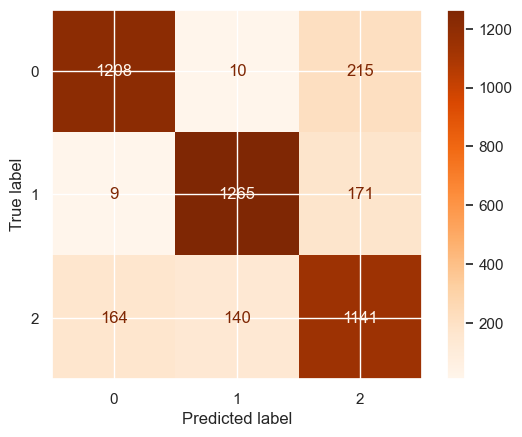

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()